## 线性回归
线性回归是利用数理统计中回归分析，来确定两种或两种以上变量间相互依赖的定量关系的一种统计分析方法，运用十分广泛。其表达形式为y = w'x+e，e为误差服从均值为0的正态分布。

回归分析中，只包括一个自变量和一个因变量，且二者的关系可用一条直线近似表示，这种回归分析称为一元线性回归分析。如果回归分析中包括两个或两个以上的自变量，且因变量和自变量之间是线性关系，则称为多元线性回归分析。



### 实例：计算匹萨的价格
假设你想计算匹萨的价格。虽然看看菜单就知道了，不过也可以用机器学习方法建一个线性回归模 
型，通过分析匹萨的直径与价格的数据的线性关系，来预测任意直径匹萨的价格。我们先用scikit 
learn写出回归模型，然后我们介绍模型的用法，以及将模型应用到具体问题中。假设我们查到了部 
分匹萨的直径与价格的数据，这就构成了训练数据，如下表所示：
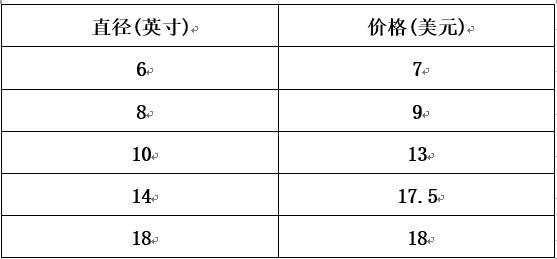



#### 可行性分析
简单而直观的方式是通过数据的可视化直接观察价格与尺寸间是否存在线性关系。

可以用matplotlib画出图形：

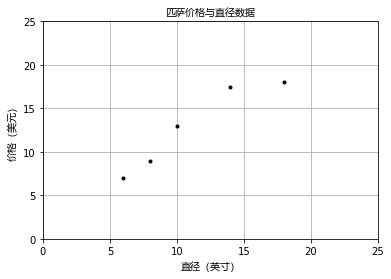

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
font = FontProperties(fname=r"c:\windows\fonts\msyh.ttc", size=10)

plt.title('匹萨价格与直径数据',fontproperties=font)
plt.xlabel('直径（英寸）',fontproperties=font)
plt.ylabel('价格（美元）',fontproperties=font)
plt.axis([0, 25, 0, 25])
plt.grid(True)
X = [[6], [8], [10], [14], [18]]
y = [[7], [9], [13], [17.5], [18]]
plt.plot(x, y, 'k.')
plt.show()

上图中，’x’轴表示匹萨直径，’y’轴表示匹萨价格。能够看出，匹萨价格与其直径正相关，这与我们的 
日常经验也比较吻合，自然是越大越贵。下面我们就用scikit-learn来构建模型。

In [9]:
from sklearn import linear_model        #表示，可以调用sklearn中的linear_model模块进行线性回归。
import numpy as np
model = linear_model.LinearRegression()
model.fit(X, y)
display(model.intercept_)  #截距
display(model.coef_)  #线性模型的系数
a = model.predict([[12]])
# a[0][0]
print("预测一张12英寸匹萨价格：{:.2f}".format(model.predict([[12]])[0][0]))

array([1.96551724])

array([[0.9762931]])

预测一张12英寸匹萨价格：13.68


调用sklearn.linear_model.LinearRegression()所需参数： 

* fit_intercept : 布尔型参数，表示是否计算该模型截距。可选参数。 

* normalize : 布尔型参数，若为True，则X在回归前进行归一化。可选参数。默认值为False。

* copy_X : 布尔型参数，若为True，则X将被复制；否则将被覆盖。 可选参数。默认值为True。

* n_jobs : 整型参数，表示用于计算的作业数量；若为-1，则用所有的CPU。可选参数。默认值为1。

线性回归fit函数用于拟合输入输出数据，调用形式为model.fit(X,y, sample_weight=None)：

• X : X为训练向量； 

• y : y为相对于X的目标向量； 

• sample_weight : 分配给各个样本的权重数组，一般不需要使用，可省略。

注意：X，y 以及model.fit()返回的值都是2-D数组，如：a= [ [ 0] ]


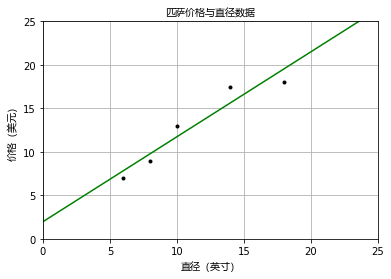

In [15]:
plt.title('匹萨价格与直径数据',fontproperties=font)
plt.xlabel('直径（英寸）',fontproperties=font)
plt.ylabel('价格（美元）',fontproperties=font)
plt.axis([0, 25, 0, 25])
plt.grid(True)
plt.plot(X, y, 'k.')
X2 = [[0], [10], [14], [25]]
model = linear_model.LinearRegression()
model.fit(X,y)
y2 = model.predict(X2)
plt.plot(X2, y2, 'g-')
plt.show()


## 最小二乘法
最小二乘法（又称最小平方法）是一种数学优化技术。它通过最小化误差的平方和寻找数据的最佳函数匹配。利用最小二乘法可以简便地求得未知的数据，并使得这些求得的数据与实际数据之间误差的平方和为最小。最小二乘法还可用于曲线拟合。其他一些优化问题也可通过最小化能量或最大化熵用最小二乘法来表达。

一元线性回归拟合模型的参数估计常用方法是普通最小二乘法（ordinary least squares ）或线性最小二乘法（linear least squares）。首先，我们定义出拟合成本函数，然后对参数进行数理统计。

下图是由若干参数生成的回归直线。如何判断哪一条直线才是最佳拟合呢？

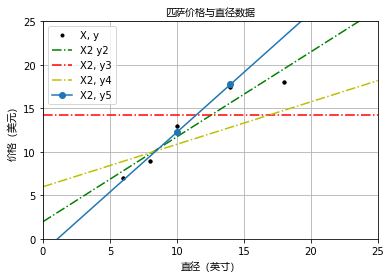

In [16]:
plt.title('匹萨价格与直径数据',fontproperties=font)
plt.xlabel('直径（英寸）',fontproperties=font)
plt.ylabel('价格（美元）',fontproperties=font)
plt.axis([0, 25, 0, 25])
plt.grid(True)
plt.plot(X, y, 'k.')
y3 = [14.25, 14.25, 14.25, 14.25]
y4 = y2*0.5 + 5
model.fit(X[1:-1], y[1:-1])
y5 = model.predict(X2)
plt.plot(X, y, 'k.', label="X, y") 
plt.plot(X2, y2, 'g-.', label="X2 y2")
plt.plot(X2, y3, 'r-.',label="X2, y3")
plt.plot(X2, y4, 'y-.',label="X2, y4")
plt.plot(X2, y5, 'o-', label="X2, y5")
plt.legend()
plt.show()


成本函数（cost function）也叫损失函数（loss function），用来定义模型与观测值的误差。模型预 
测的价格与训练集数据的差异称为残差（residuals）或训练误差（training errors）。后面我们会用 
模型计算测试集，那时模型预测的价格与测试集数据的差异称为预测误差（prediction errors）或测试误差（test errors）。

附：李航老师的统计学习方法中：将训练误差称为近似误差，将预测误差称为估计误差 
* 近似误差：可以理解为对现有训练集的训练误差。 
* 估计误差：可以理解为对测试集的测试误差。

模型的残差是训练样本点与线性回归模型的纵向距离，如下图所示


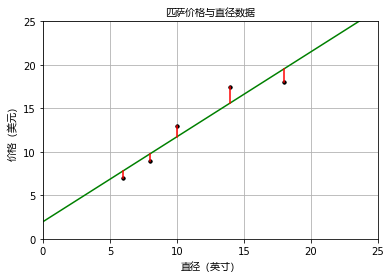

In [17]:
plt.title('匹萨价格与直径数据',fontproperties=font)
plt.xlabel('直径（英寸）',fontproperties=font)
plt.ylabel('价格（美元）',fontproperties=font)
plt.axis([0, 25, 0, 25])
plt.grid(True)
plt.plot(X, y, 'k.')
X2 = [[0], [10], [14], [25]]
model = linear_model.LinearRegression()
model.fit(X, y)
y2 = model.predict(X2)
plt.plot(X, y, 'k.')
plt.plot(X2, y2, 'g-')

# 残差预测值
yr = model.predict(X)
#  enumerate 函数可以把一个 list 变成索引-元素对
for idx, x in enumerate(X):
    plt.plot([x, x], [y[idx], yr[idx]], 'r-')
plt.show()


我们可以通过残差之和最小化实现最佳拟合，也就是说模型预测的值与训练集的数据最接近就是最佳 
拟合。对模型的拟合度进行评估的函数称为残差平方和（residual sum of squares）
成本函数。就是 让所有训练数据与模型的残差的平方之和最小化，如下所示： 
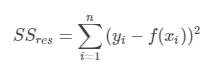
其中，yiyi 是观测值，f(xi)f(xi) 是预测值。

残差平方和计算如下：


In [19]:
import numpy as np
print('残差平方和:{:.2f}'.format(np.mean((model.predict(X) - y) ** 2)))

残差平方和:1.75


解一元线性回归的最小二乘法

通过成本函数最小化获得参数，我们先求系数β。按照频率论的观点，我们首先需要计算 x的方 
差和 x与 y的协方差。
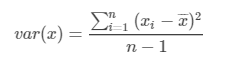

其中， x¯¯¯是直径x 的均值， xi的训练集的第 i个直径样本， n是样本数量。计算如下：

In [20]:
xbar = (6 + 8 + 10 + 14 + 18) / 5
variance = ((6 - xbar)**2 + (8 - xbar)**2 + (10 - xbar)**2 + (14 - xbar)**2 + (18 - xbar)**2) / 4
print(variance)


23.2


Numpy里面有var方法可以直接计算方差，ddof参数是：Delta Degrees of Freedom“：计算中使用的除数是”N-ddof“，其中”N“代表元素的数量。默认情况下，”ddof“为零。设置为1，可得样本方差无偏估计量

In [21]:
import numpy as np
print(np.var([6, 8, 10, 14, 18], ddof=1))

23.2


协方差表示两个变量的总体的变化趋势。如果两个变量的变化趋势一致，也就是说如果其中一个大于 
自身的期望值，另外一个也大于自身的期望值，那么两个变量之间的协方差就是正值。 如果两个变 
量的变化趋势相反，即其中一个大于自身的期望值，另外一个却小于自身的期望值，那么两个变量之 
间的协方差就是负值。如果两个变量不相关，则协方差为0，变量线性无关不表示一定没有其他相关 
性。协方差公式如下： 
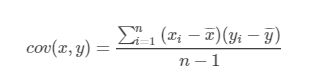
Numpy里面有cov方法可以直接计算协方差

In [22]:
import numpy as np
print(np.cov([6, 8, 10, 14, 18], [7, 9, 13, 17.5, 18])[0][1])

22.650000000000002


现在有了方差和协方差，就可以计算系数 β了 
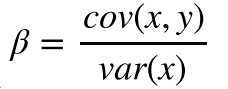

算出β 后，我们就可以计算α 了: 
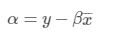
将前面的数据带入公式就可以求出α 了: 

α=12.9−0.9762931034482758×11.2=1.9655172413793114

这样就通过最小化成本函数求出模型参数了。把匹萨直径带入方程就可以求出对应的价格了，如11英 
寸直径价格$12.70，18英寸直径价格$19.54。